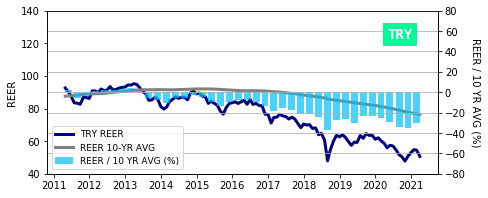

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Importing REER data series
df = pd.read_excel("Raw data/REER.xlsx", index_col=0)

#Dropping the last row as it appears to be a duplicate (?)
df = df.iloc[:-1 , :]

#Enter CCY below - TRY/RUB/TWD/EGP
ccy = "TRY"

CCY = df[[ccy]]
windowLength = 120

#Cleaning up the raw dataset
CCY = CCY.iloc[2:]
CCY.rename(columns = {ccy : 'REER'}, inplace = True)

#Calculation of 10-year moving average
CCY["10_yr_avg"] = CCY["REER"].rolling(window=windowLength).mean()

#Dropping NaNs in the '10_yr_avg'
CCY = CCY[CCY['10_yr_avg'].notna()]

#Adding supporting column for dates
CCY["Date"] = CCY.index.values

#Calculating REER/10-yr averages on a quarterly basis for the bar chart
CCY['month'] = pd.DatetimeIndex(CCY.index.values).month
CCY["avg"] = ((CCY["REER"]/ CCY["10_yr_avg"])-1)*100
CCY["qtr_avg"] = np.where(CCY["month"] % 3 == 2, (CCY["avg"].shift(-1) + CCY["avg"] + CCY["avg"].shift(+1))/3, "NaN")

#U_O = undervalued - overvalued. Dropping NaNs so that we only have quarterly averages in the list
U_O = CCY.loc[CCY["qtr_avg"] != "NaN"]

#Plotting
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(CCY.index.values, 'REER', data=CCY, color = "navy", linewidth=3, label=ccy + " REER")
ax.plot(CCY.index.values, '10_yr_avg', data=CCY, color = "grey", alpha = 1, linewidth=3, label="REER 10-YR AVG")
ax.set_ylim(40, 140)
ax2 = ax.twinx()
ax2.bar(U_O["Date"], U_O["qtr_avg"], width = 70, color="deepskyblue", alpha = 0.7, label="REER / 10 YR AVG (%)")
ax2.set_ylim(-80, 80)
ax2.grid(axis='y')
ax.set_ylabel('REER')
ax2.set_ylabel('REER / 10 YR AVG (%)', rotation=-90, labelpad=15)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels, loc="lower left", prop={'size': 9})
ax.text(0.87, 0.9, ccy, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', backgroundcolor="mediumspringgreen", color="white", fontweight="heavy", fontfamily="monospace")

#Export chart as png
plt.savefig("Charts/" + ccy +'.png', bbox_inches='tight')

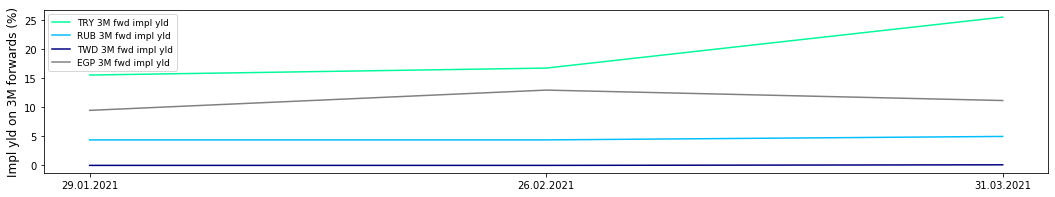

In [76]:
#Importing implied yield dataset
CCY_yld = pd.read_excel("Raw data/impl_yld.xlsx", index_col=0)

#Setting up dictionaries for for loops
CCY_dict = ["TRY", "RUB", "TWD", "EGP"]
color_dict=["mediumspringgreen", "deepskyblue", "navy", "grey"]

#Cleaning up the raw dataset
CCY_yld = CCY_yld.iloc[2:]

#Plotting
fig, ax = plt.subplots(figsize=(18,3))
for i in range(0,4):
    ax.plot(CCY_yld.index.values, CCY_dict[i], data = CCY_yld, label=CCY_dict[i]+ " 3M fwd impl yld", color=color_dict[i])
ax.legend(loc="upper left", prop={'size': 9})
ax.set_ylabel('Impl yld on 3M forwards (%)', fontsize=12)

#Export chart as png
plt.savefig('Charts/impl_yld.png', bbox_inches='tight')